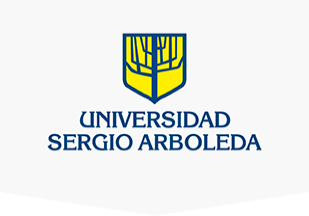

Fecha: 22-11-2022

Autor:  *Jesus Chaves*

Materia: *Métricas de rendimiento HPC-2*

Tópico: *Regresión Logística*

# **Regresión Logística**

La regresión logística es un método con base en la estadistica que resulta útil para los casos en los que se desea predecir la presencia o ausencia de una característica o resultado según los valores de un conjunto de predictores. Es similar a un modelo de regresión lineal, pero está adaptado para modelos en los que la variable dependiente es dicotómica. Los coeficientes de regresión logística pueden utilizarse para estimar la razón de probabilidad de cada variable independiente del modelo. La regresión logística se puede aplicar a un rango más amplio de situaciones de investigación que el análisis discriminante.

**Ejemplo**. ¿Qué características del estilo de vida son factores de riesgo de enfermedad cardiovascular? Dada una muestra de pacientes a los que se mide la situación de fumador, dieta, ejercicio, consumo de alcohol, y estado de enfermedad cardiovascular, se puede generar un modelo utilizando las cuatro variables de estilo de vida para predecir la presencia o ausencia de enfermedad cardiovascular en una muestra de pacientes. El modelo puede utilizarse posteriormente para derivar estimaciones de la razón de probabilidad para cada uno de los factores y así indicarle, por ejemplo, cuánto más probable es que los fumadores desarrollen una enfermedad cardiovascular frente a los no fumadores.

Fuente: 
[*IBM - SPSS Statistics*](https://www.ibm.com/docs/es/spss-statistics/SaaS?topic=regression-logistic)

### **Scikit-Learn**

*Scikit-Learn* es una de estas librerías gratuitas para Python. Cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. Además, presenta la compatibilidad con otras librerías de Python como NumPy, SciPy, Seaborn y matplotlib.

La gran variedad de algoritmos y utilidades de Scikit-learn la convierten en la herramienta básica para empezar a programar y estructurar los sistemas de análisis datos y modelado estadístico. Los algoritmos de Scikit-Learn se combinan y depuran con otras estructuras de datos y aplicaciones externas como Pandas o PyBrain.

*Modelo de regresión logistica Scikit-Learn:*
[enlace](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)



## **1. Importe de librerias:** Pandas, Numpy, Seaborn, Matplotlib

* Adicional se importal el modelo de regresion logistica por **sklearn**.

In [50]:
# Se importan las biliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## **2. Cargue del data set:** 
Se realiza el importe del data set [*Pima Indians Diabetes Database*](https://raw.githubusercontent.com/jchaves1406/Datasets/main/diabetes.csv) . Se contruirá un modelo que intente predecir si un paciente padece diabetes o no. En nuestro dataframe la variable *Outcome* corresponderá a nuestras variables independientes (***Target***) la cual representará nuestro dato categórico el cual corresponde a una variable binaria, es decir, solamente tendrá los valores de 1 y 0, de los cuales 1 corresponde a pacientes que padecen diabetes y 0 a pacientes que no padecen diabetes. Por otro lado, las demás variables serán nuestras variables dependientes (***Features***).


In [8]:
# Importe del dataset a un objeto dataframe pandas
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/Datasets/main/diabetes.csv')

# Motrar las primeras 5 posiciones de nuestro dataFrame
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#Se requiere conocer el nombre de cada una de las variables
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## **2.1 Descripción de variables:** 
1. Pregnancies: Número de embarazos.
2. Glucose: Nivel de glucosa en la sangre.
3. BloodPressure: Presión sanguinea.
4. SkinThickness: Grosor de piel.
5. Insulin: Nivel de insulina en la sangre.
6. BMI: Índice de masa corporal (Body Mass Index).
7. DiabetesPedigreeFunction: Indica la función que califica la probabilidad de diabetes en función de los antecedentes familiares.
8. Age: Edad de la persona.
9. Outcome: Valor binario, tiene o no diabetes.



## **2.2 EDA (Exploratory Data Analisys) exploracion basica de datos**


El método **DataFrame.describe()** genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores de NaN. Este método muestra muchas cosas sobre un conjunto de datos. Una cosa importante es que el método **describe()** trata solo con valores numéricos. No funciona con valores categóricos. Entonces, si hay valores categóricos en una columna, el método **describe()** lo ignorará y mostrará un resumen para las otras columnas a menos que se pase el parámetro include = "all".

Ahora, entendamos las estadísticas que se generan con el método describe ():
* count muestra el número de filas vacías NaN en cada variable.
* mean muestra el valor medio de cada variable.
* std muestra el valor de desviación estándar de cada variable. Esta medida corresponde a que tan alejados estan los datos de la media.
* min muestra el valor mínimo de cada variable.
* 25%, 50% y 75% son el percentil / cuartil de cada variable. Esta información de cuartiles nos ayuda a detectar valores atípicos.
* max muestra el valor máximo de cada variable.

Fuente: [pandas docs(DataFrame.describe)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)

In [10]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **2.4 Información del dataFrame:** Tipos de datos

Para saber qué tipo de datos tiene nuestro dataFrame usaremos el método ***.info()*** el cual mostrará rmación sobre los tipos de datos, columnas, recuentos de valores nulos, uso de memoria, etc.

Fuente: [pandas docs(DataFrame.info)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)


In [11]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **2.5 Valores nulos**
¿Puede el valor mínimo de las columnas enumeradas a continuación ser cero (0)?

* En estas columnas, un valor de cero no tiene sentido y, por lo tanto, indica un valor faltante. Las siguientes columnas o variables tienen un valor cero no válido:
  1. Glucosa
  2. Presión sanguínea
  3. SkinThickness
  4. Insulina
  5. IMC
  
Es mejor reemplazar ceros con NaN, ya que luego contarlos sería más fácil y los ceros deben reemplazarse con valores adecuados.

In [12]:
# Se reemplaza los ceros (0) con NaN (valores nulos)
# Se realiza una copia del dataframe
df_diabetes_copy = df_diabetes.copy(deep = True)
df_diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Mostrar el conteo de valores nulos
print(df_diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


* Para tomar una desicion respecto a los valores desaparecidos o nulos (NaN), es necesario comprender la distribución de datos, para esto, utilizaremos graficas de barras para asi tener una mejor comprension general del dataFrame.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3bb80bbd0>,
      dtype=object)

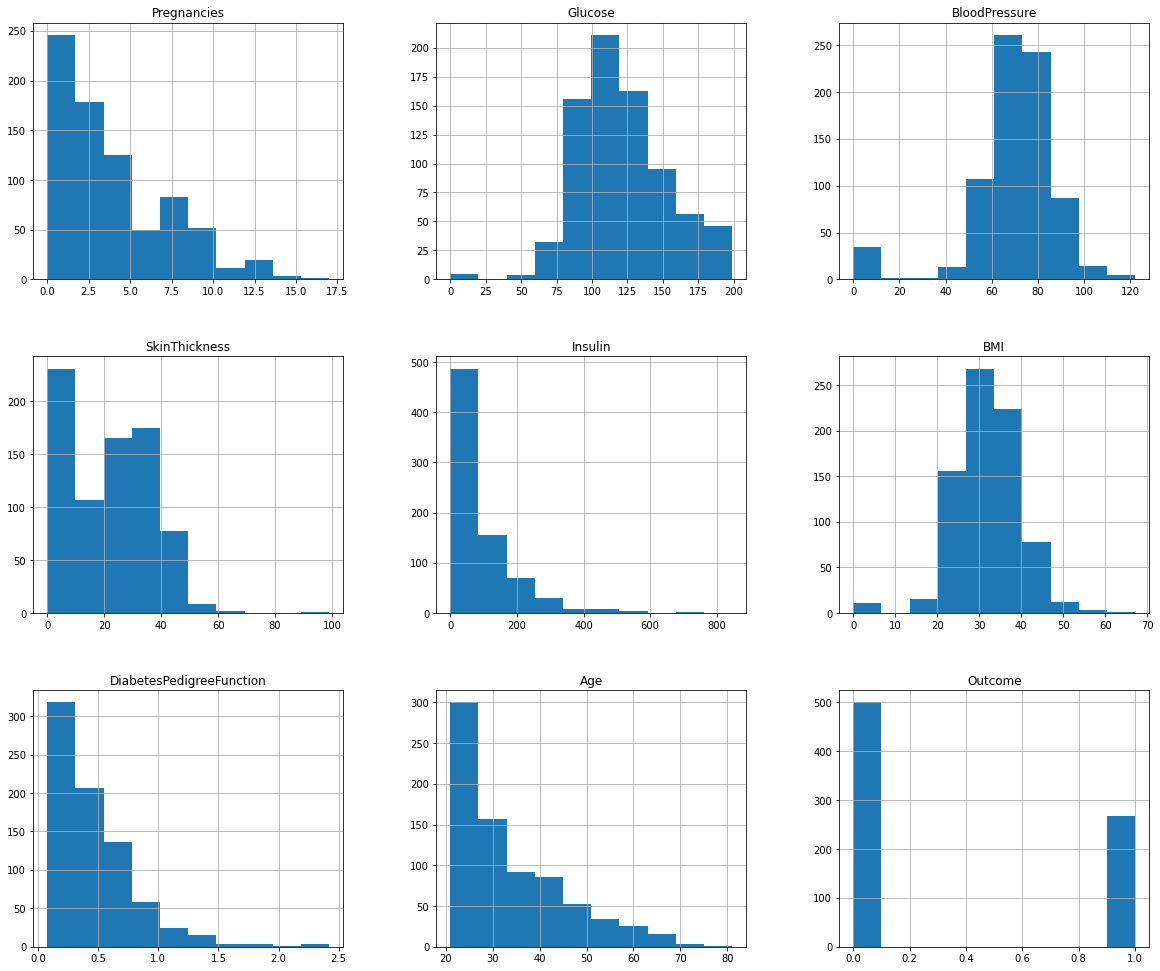

In [13]:
# Se genera histograma
df_diabetes.hist(figsize = (20,17))

## **2.6 Valores nulos: Tratamiento**

* Se observa que que en la mayoría de variables se presenta un comportamiento normal en la distribución de datos pero las variables con datos desaparecidos como 'SkinThickness', 'Insuline', 'BloodPreasure', 'BMI' y 'Glucose' el comportamiento se ve ligeramente alterado.

* Se toma la decisión de completar estos valores perdidos con la media de cada variable para que los datos tengan un comportamiento y distribución similar a la anterior, además, como es un dataset pequeño si tomamos la decisión de eliminar los valores perdidos el dataset resultante sería bastante reducido por lo cual el modelo sería peor. Sin embargo se recomienda que el dataset original no debería tener datos perdidos o nulos a la hora de construir satisfactoriamente el modelo de regresión y más importante, con datos reales. 

* Con el objetivo de imputar un valor a las variables con valores NaN para las columnas anteriormente mencionadas, de acuerdo con la media de su distribución tenemos:

In [14]:
# Se reemplazan los valores nulos con la media de cada variable
df_diabetes_copy['Glucose'].fillna(df_diabetes_copy['Glucose'].mean(), inplace = True)
df_diabetes_copy['BloodPressure'].fillna(df_diabetes_copy['BloodPressure'].mean(), inplace = True)
df_diabetes_copy['SkinThickness'].fillna(df_diabetes_copy['SkinThickness'].mean(), inplace = True)
df_diabetes_copy['Insulin'].fillna(df_diabetes_copy['Insulin'].mean(), inplace = True)
df_diabetes_copy['BMI'].fillna(df_diabetes_copy['BMI'].mean(), inplace = True)

* Se genera nuevo dataset para ser usada en el modelo artesanal desarrollado en C++ con los valores perdidos como la media de cada variable.

In [15]:
# Se exporta dataframe a csv
df_diabetes_copy.to_csv('diabetes.csv', header=True, index=False)

* Trazado después del tratamiento de los valores nulos:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3bae5fb50>,
      dtype=object)

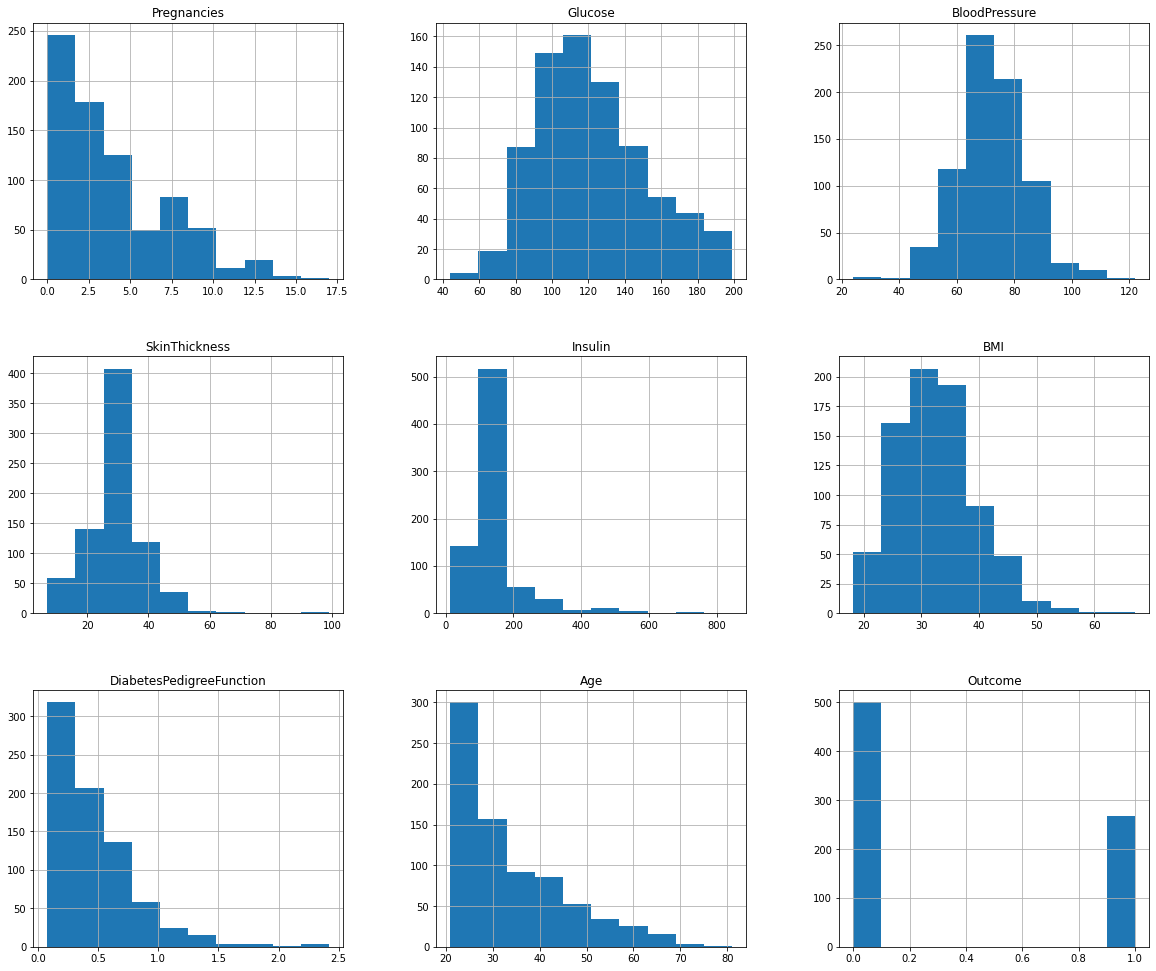

In [16]:
# Se genera histograma
df_diabetes_copy.hist(figsize = (20,17))

* Se observa que despues del tratamiento de los valores nulos se presenta una distribucion normal en las variables modificadas

## **2.7 Distribución de variables**

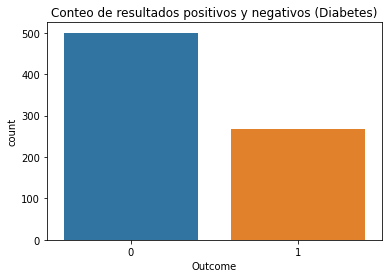

In [17]:
# Comprobar el equilibrio de los datos trazando el recuento de resultados por su valor
sns.countplot(x='Outcome', data=df_diabetes_copy)
plt.title('Conteo de resultados positivos y negativos (Diabetes)')
plt.show()

* Se observa que alrededor de la tercera parte de las personas en el dataset padecen de diabetes

## **2.8 Visualización:** Matriz de dispersión par por variable

El diagrama de pares se basa en dos figuras básicas, el histograma y el diagrama de dispersión. El histograma en la diagonal nos permite ver la distribución de una sola variable, mientras que los diagramas de dispersión en los triángulos superior e inferior muestran la relación (o falta de ella) entre dos variables.

Referencia: [towardsdatascience.com](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ba957310>,
      dtype=object)

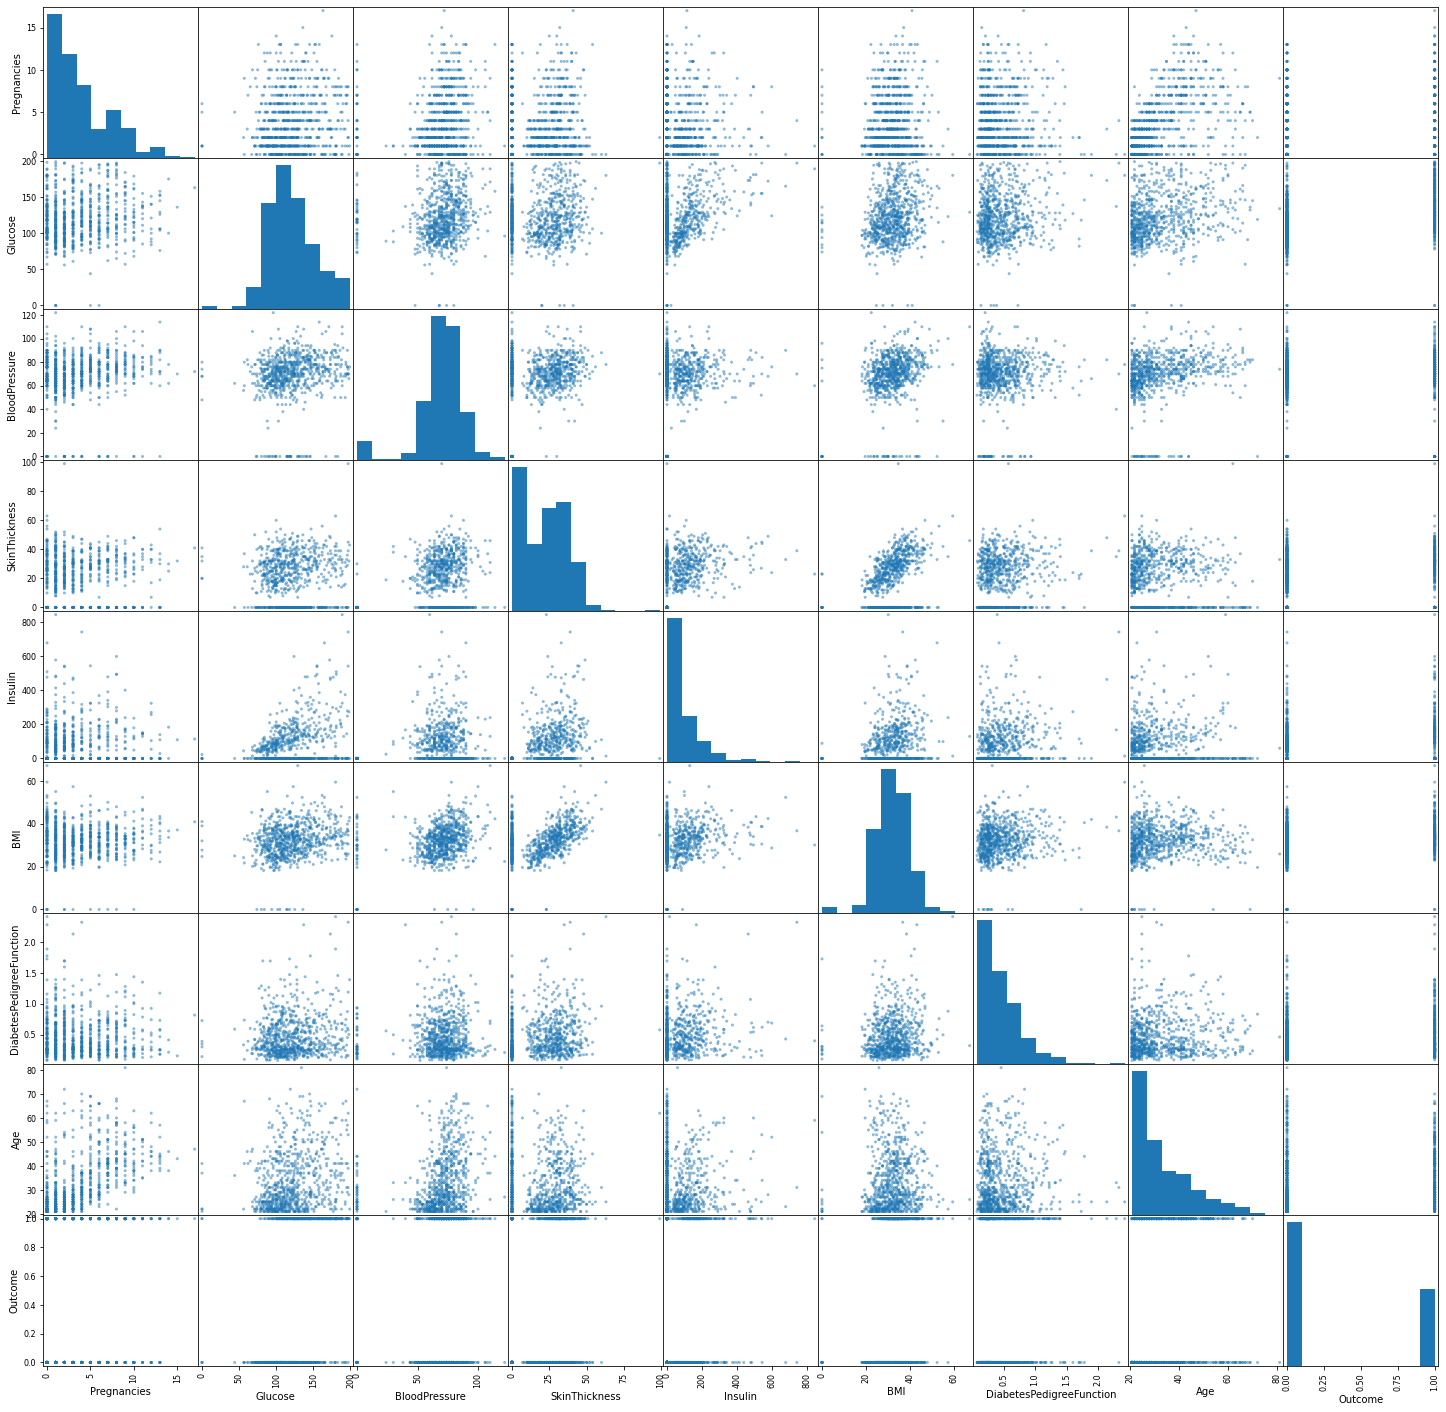

In [18]:
# Matriz de dispersión
pd.plotting.scatter_matrix(df_diabetes,figsize=(25, 25))

* Se observa en la matriz anterior que las nubes de dispersión tienden a converger a un rango de valores específico, sin embargo se alcanza a apreciar algunos valores que se alejan de la nube los cuales podrían ser outliers, hay que recordar que un outlier es una observación anormal y extrema en una muestra estadística o serie temporal de datos que puede afectar potencialmente a la estimación de los parámetros del mismo cuando se analiza la variable a estudiar como un conjunto, por ejemplo el valor promedio de la variable.

## **2.9 Visualizacion:** Por por variable (Correlacion por coeficiente de Pearson's)

**Coeficiente de correlación de Pearson**: le ayuda a averiguar la relación entre dos cantidades. Le da la medida de la fuerza de asociación entre dos variables. El valor del coeficiente de correlación de Pearson puede estar entre -1 y +1. 1 significa que están altamente correlacionados y 0 significa que no hay correlación.

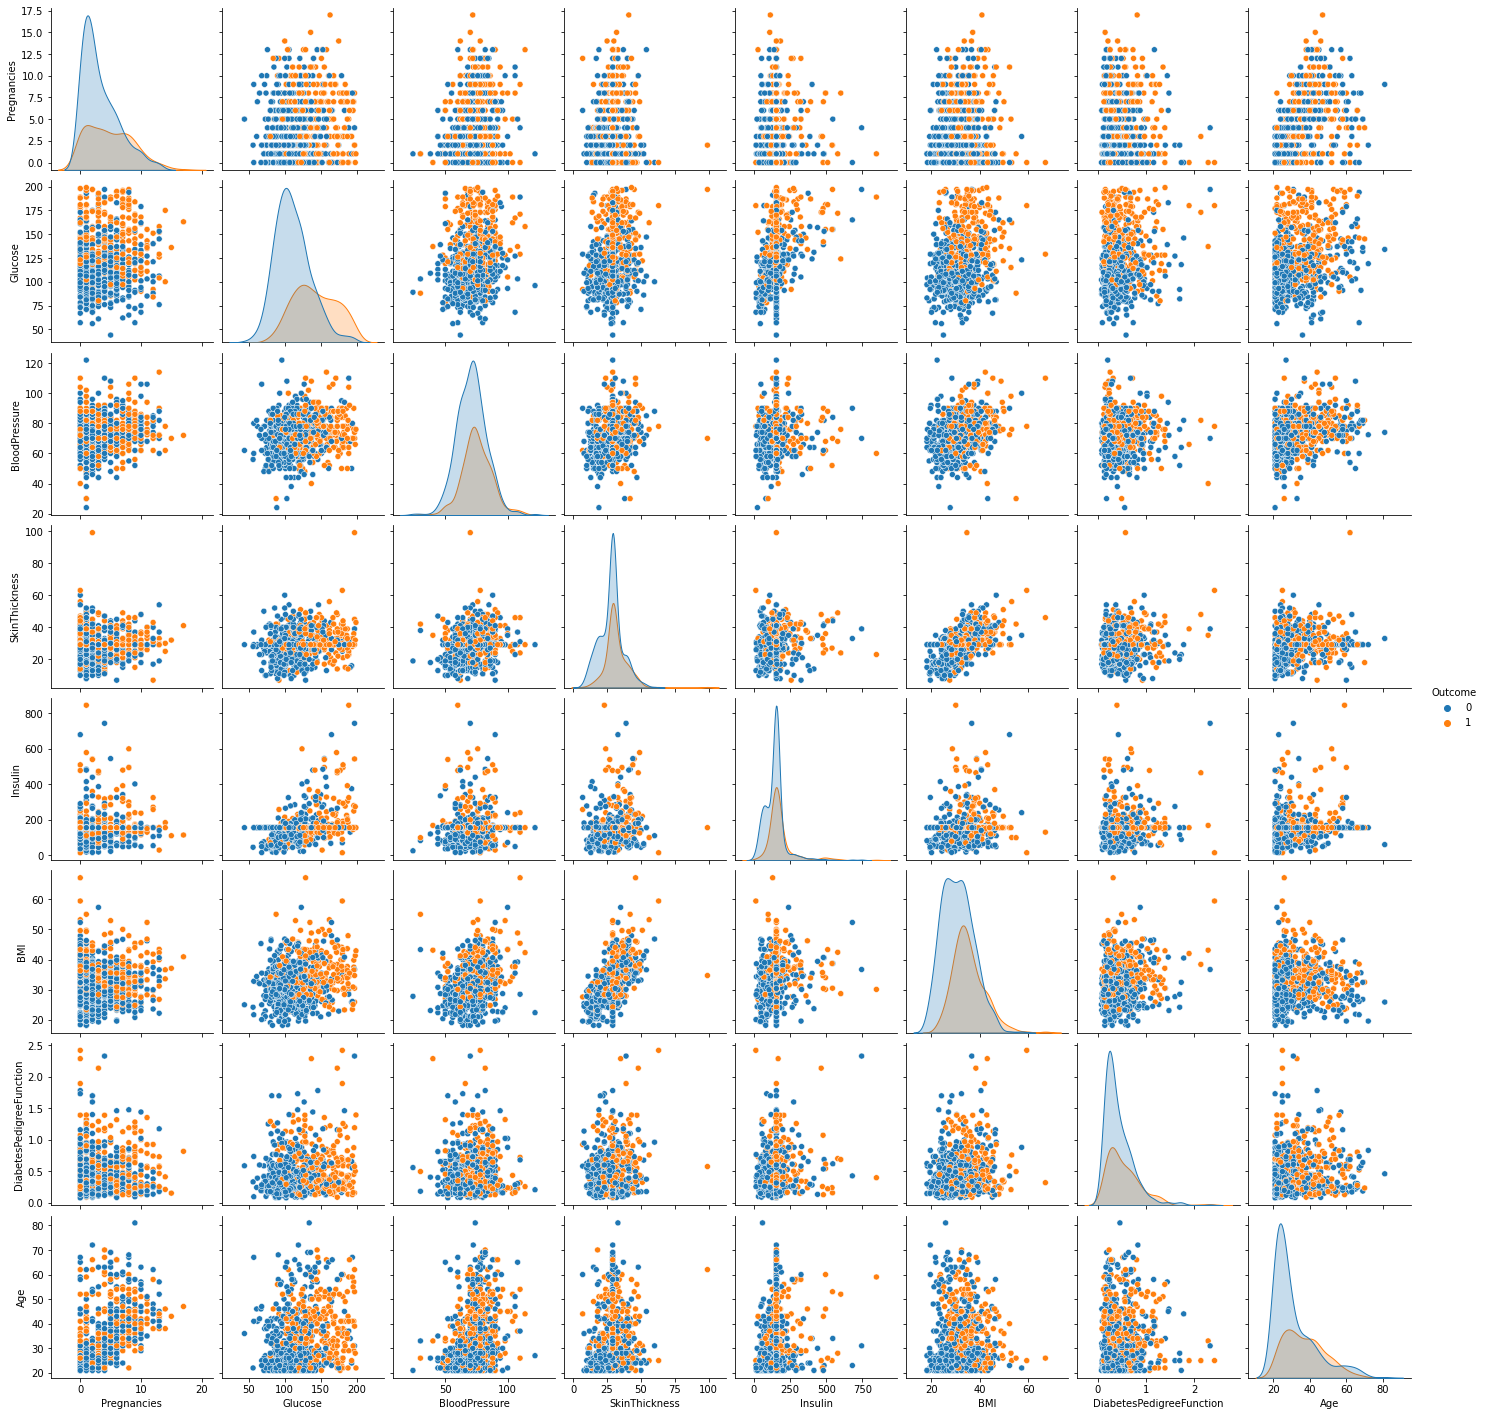

In [19]:
sns.pairplot(df_diabetes_copy, hue = 'Outcome')

## **2.10 Mapa de calor:** Dataframe procesado (sin valores nulos o perdidos)

La matriz de correlación muestra los valores de correlación de Pearson, que miden el grado de relación lineal entre cada par de elementos o variables. Los valores de correlación se pueden ubicar entre -1 y +1. Sin embargo, en la práctica, los elementos por lo general tienen correlaciones positivas.

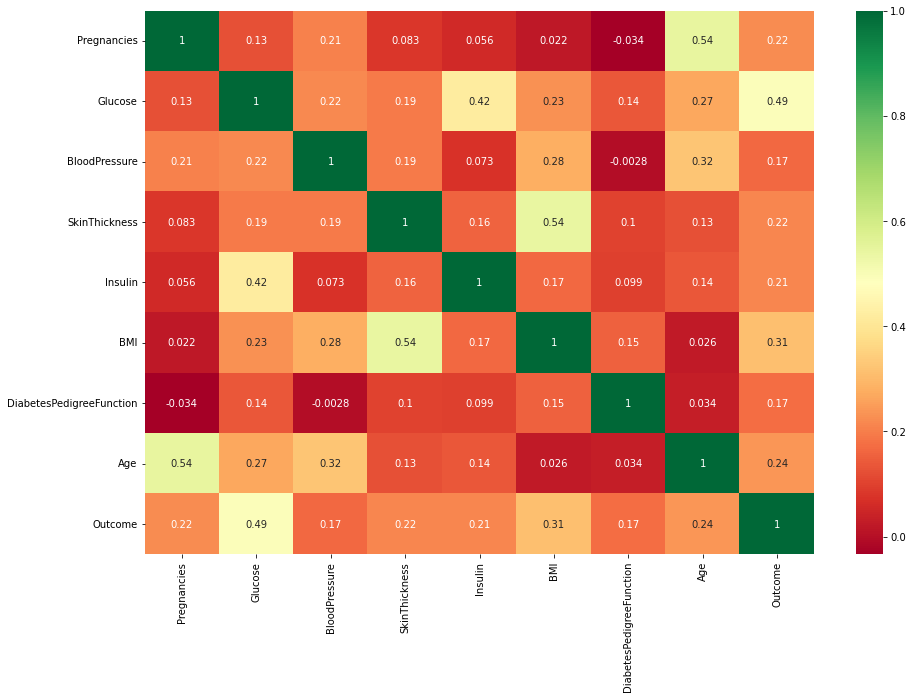

In [20]:
# Se genera matriz de correlacion
plt.figure(figsize=(15,10))
sns.heatmap(df_diabetes_copy.corr(), annot=True, cmap ='RdYlGn')

* Se observa que algunas variables presentan una correlación positiva alta, esto es bueno porque una correlación alta influye de manera positiva en el momento de entrenar el modelo dado que existe asociación entre variables, sin embargo, hay bastantes correlaciones muy débiles lo cual prevé que al evaluar el modelo este no tendrá una capacidad muy significativa en el momento de estimar la predicción. 

# **3. Comparativa entre python y algoritmo artesanal en C++**

Se elaboró un modelo de regresión logística en el lenguaje C++ utilizando la librería [Eigen](https://eigen.tuxfamily.org/index.php?title=Main_Page) la cual implementa numerosas funciones para el cálculo de matrices en tales como factorización de matrices, métodos directos e iterativos para la resolución de sistemas lineales, transformada rápida de Fourier, etc. Se utilizó como modelo las librerías y algoritmos de [Sci-Kit learn](https://scikit-learn.org/stable/index.html), para comprobar nuestro programa elaboramos un modelo en Python usando las librerías [Numpy](https://numpy.org/), [pandas](https://pandas.pydata.org/) y [Matplolib](https://matplotlib.org/)  e importando el modelo [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) para realizar la comparación de nuestros resultados en cuanto a predicción, normalización, correlación y función de costo. 

A continuacion se realiza una comparativa entre los resultados arrojados por los algoritmos realizados en el lenguaje C++ respecto al modelo en Python con Sklearn.


### **3.1 Promedio y Desviación estandar en C++:**

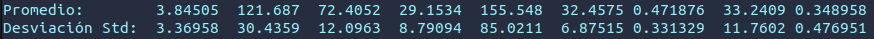 

 

 



In [21]:
# Calculo de el promedio y la desviación estandar
print(f'Promedios: \n{df_diabetes_copy.mean()}')
print(f'Desviación estandar: \n{df_diabetes_copy.std()}')

Promedios: 
Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64
Desviación estandar: 
Pregnancies                  3.369578
Glucose                     30.435949
BloodPressure               12.096346
SkinThickness                8.790942
Insulin                     85.021108
BMI                          6.875151
DiabetesPedigreeFunction     0.331329
Age                         11.760232
Outcome                      0.476951
dtype: float64


## **3.2 Identificar y separar variables:**

Se ajusta nuestro dataFrame al modelo de regresión logistica, para esto separaremos nuestras ***features (variables independientes)*** de nuestra variable ***target (variable dependiente)*** en nuestro caso es la variable **'Outcome'**, de la siguiente manera:

In [22]:
# Se realiza la seleccion de las features y la variable independiente
X = df_diabetes_copy.drop(['Outcome'], axis = 1)
y = df_diabetes_copy['Outcome']

### **3.2 Normalizacion C++:**

Primeras 5 filas:

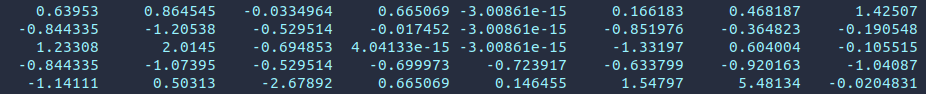

Ultimas 5 filas:

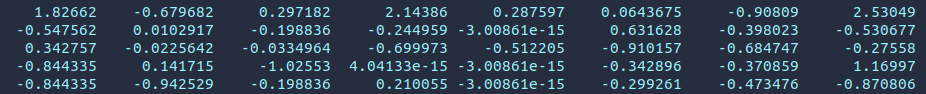 

 








In [23]:
# Se realizara el proceso de normalización a las features
scaler = StandardScaler()
df_diabetes_data_scaled = pd.DataFrame(scaler.fit_transform(X))
df_diabetes_data_scaled

,0,1,2,3,4,5,6,7
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732


* Se observa que los cálculos de las funciones de promedio, desviación estándar y normalización desarrolladas en C++ arrojan resultados muy similares a los resultados de Python, la variación puede deberse al tratamiento de los datos perdidos o nulos realizados para el dataframe anteriormente, el redondeo de los numeros y la precisión a la hora de realizar los cálculos en cada lenguaje.

## **3.3 Dividir en grupos de entrenamiento y prueba:**
 
Para entrenar nuestro modelo de Regresión y poder saber si está funcionando bien, separaremos el conjunto de datos inicial en 2: conjunto de entrenamiento (train) y conjunto de pruebas (test). Por lo general se divide haciendo “80-20”. En este caso no tomaremos muestras aleatorias de nuestro data Frame por lo cual indicaremos en la función `shuffle=False`.

In [24]:
# Se separan los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2008, shuffle=False)

## **3.4 Creación del modelo de entrenamiento:**

Para la creación del modelo se usará pipeline de la libreria de sklearn. **Pipeline** es una “tubería” que consiste en una cadena de procesos conectados de forma tal que la salida de cada elemento de la cadena es la entrada del próximo. Permiten la comunicación y sincronización entre procesos. Es común el uso de búfer de datos entre elementos consecutivos.
 
Acontinuación podemos ver un ejemplo de  [sklearn.pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) y entender un poco mas su funcionamiento.

In [25]:
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LogisticRegression())])


## **3.5 Predicciones de entrenamiento y prueba por sklearn:**

A continuación creamos dos variables las cuales van a contener las predicciones tanto de prueba como entrenamiento para nuestro modelo de entrenamiento realizado en python con sklearn.

In [26]:
y_hat_train_sk = pipe.predict(X_train)
y_hat_test_sk = pipe.predict(X_test)

## **4. Comparativa con el modelo artesanal realizado en C++:**
 
Se evaluará la similitud entre el modelo de python con sklearn contra el modelo realizado en C++ con la data normalizada y optimizando la función de costo mediante el cálculo del gradiente descendiente en C++. El Gradiente Descendente es un algoritmo computacional que permite determinar de forma automática el mínimo de una función matemática.Para ello hace uso de el gradiente (o derivada) de dicha función, que permite “guiar” al algoritmo para de manera progresiva acercarse al mínimo ideal de dicha función.
 
A continuación importamos el fichero generado por el modelo de Regresión Lineal en C++ el cual corresponde a nuestra función de costo optimizada(Gradiente descendiente).

In [28]:
# Se importa el vector de costo del modelo artesanal en C++
cost_cpp = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/HPC-Logistic_Regression/main/Ficheros_cpp/vector_costo.txt', header=None)
cost_cpp

,0
0,0.688632
1,0.583843
2,0.538885
3,0.515173
4,0.500790
...,...
95,0.459450
96,0.459450
97,0.459450
98,0.459450


## **4.1 Gráfica de la función de costo del modelo en C++:**
 
A continuación, se grafica la función de costo del modelo artesanal. 

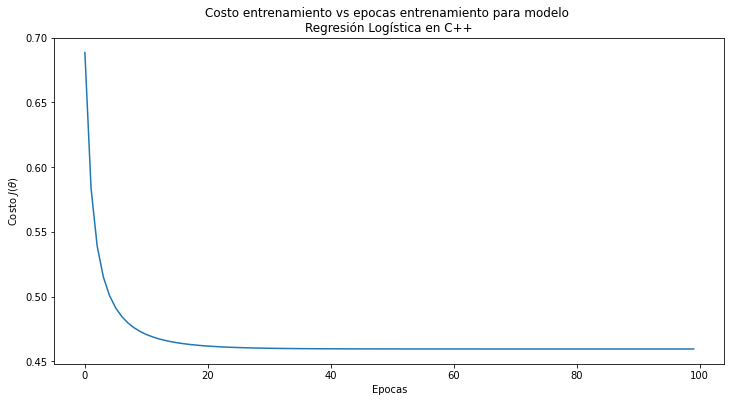

In [29]:
# Se realiza una gráfica con ayuda de matplotlib con la función de costo del modelo C++
fig, axes = plt.subplots(figsize=(12,6))

axes.plot(cost_cpp)
axes.set_title('Costo entrenamiento vs epocas entrenamiento para modelo \nRegresión Logística en C++')
axes.set_xlabel('Epocas')
axes.set_ylabel(r'Costo $J(\theta)$')
plt.show()

En la gráfica anterior se puede observar como el costo disminuye con cada iteración hasta converger a el mínimo de la función que es lo que buscamos con el cálculo del gradiente descendiente estocastico.

## **4.2 Importe y comparativa de las predicciones de entrenamiento y prueba realizadas mediante el modelo en C++:**

Se importan los ficheros generados por el modelo realizado en C++ con las predicciones de entrenamiento y prueba.

In [30]:
# Se importan los ficheros con las predicciones entregadas por el modelo desarrollado en C++
y_hat_train_cpp = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/HPC-Logistic_Regression/main/Ficheros_cpp/y_hat_train.txt', header=None)
print(y_hat_train_cpp)
y_hat_test_cpp = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/HPC-Logistic_Regression/main/Ficheros_cpp/y_hat_test.txt', header=None)
print(y_hat_test_cpp)

     0
0    1
1    0
2    1
3    0
4    0
..  ..
608  1
609  0
610  0
611  1
612  1

[613 rows x 1 columns]
     0
0    0
1    0
2    0
3    0
4    0
..  ..
150  0
151  0
152  0
153  0
154  0

[155 rows x 1 columns]


In [31]:
# Se crea dataframe con las predicciones de entrenamiento entre los modelos sklearn y C++
df_train = pd.DataFrame({'Actual': y_train, 'Predicciones sklearn (entrenamiento)': y_hat_train_sk, 'Predicciones C++ (entrenamiento)': y_hat_train_cpp[0].tolist()})
df_train

,Actual,Predicciones sklearn (entrenamiento),Predicciones C++ (entrenamiento)
0,1,1,1
1,0,0,0
2,1,1,1
3,0,0,0
4,1,1,0
...,...,...,...
608,0,1,1
609,0,0,0
610,0,0,0
611,1,1,1


In [32]:
# Comparativa de las predicciones de entrenamiento por parte del modelo de sklearn respecto al de C++
train_sk = df_train['Predicciones sklearn (entrenamiento)'].sum()
train_cpp = df_train['Predicciones C++ (entrenamiento)'].sum()
print('Predicciones afirmativas sklearn (entrenamiento): ', train_sk)
print('Predicciones afirmativas C++ (entrenamiento): ', train_cpp)
print('Variación: ', ((train_sk - train_cpp)/train_sk)*100)

Predicciones afirmativas sklearn (entrenamiento):  167
Predicciones afirmativas C++ (entrenamiento):  167
Variación:  0.0


* Las predicciones entre el modelo de C++ no tiene variacion respecto al modelo realizado en Python para los datos de entrenamiento.

In [34]:
# Se crea dataframe con las predicciones de prueba entre los modelos sklearn y C++
df_test = pd.DataFrame({'Actual': y_test, 'Predicciones sklearn (prueba)': y_hat_test_sk, 'Predicciones C++ (prueba)': y_hat_test_cpp[0].tolist()})
df_test

,Actual,Predicciones sklearn (prueba),Predicciones C++ (prueba)
613,0,0,0
614,1,1,0
615,0,0,0
616,0,0,0
617,0,0,0
...,...,...,...
763,0,0,0
764,0,0,0
765,0,0,0
766,1,0,0


In [35]:
# Comparativa de las predicciones de prueba por parte del modelo de sklearn respecto al de C++
test_sk = df_test['Predicciones sklearn (prueba)'].sum()
test_cpp = df_test['Predicciones C++ (prueba)'].sum()
print('Predicciones afirmativas sklearn (prueba): ', test_sk)
print('Predicciones afirmativas C++ (prueba): ', test_cpp)
print('Variación: ', ((test_sk - test_cpp)/test_sk)*100)

Predicciones afirmativas sklearn (prueba):  41
Predicciones afirmativas C++ (prueba):  40
Variación:  2.4390243902439024


* Las predicciones entre el modelo de C++ varia en aproximadamente 2.43% respecto al modelo realizado en Python para los datos de prueba.

## **3. Métricas de rendimiento del modelo:** Matriz de confusion (Teoria)

La matriz de confusión es una técnica utilizada para resumir el rendimiento de un algoritmo de clasificación, es decir, tiene salidas binarias.

A continuacion un ejemplo donde tenemos una cantidad de datos n = 165.

![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)


**Ejemplo del cáncer:**


Los casos en los que el médico predijo SÍ (tienen la enfermedad) y tienen la enfermedad se denominarán VERDADEROS POSITIVOS (TP). El médico ha predicho correctamente que el paciente tiene la enfermedad.

Los casos en los que el médico predijo NO (no tienen la enfermedad) y no tienen la enfermedad se denominarán VERDADEROS NEGATIVOS (TN). El médico ha predicho correctamente que el paciente no tiene la enfermedad.

Los casos en los que el médico predijo SÍ y no tienen la enfermedad se denominarán FALSOS POSITIVOS (FP). También conocido como "error de tipo I".

Los casos en los que el médico predijo NO y tienen la enfermedad se denominarán FALSOS NEGATIVOS (FN). También conocido como "error de tipo II".


Referencia: [medium.com (Matriz de confusion)](https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327)

In [45]:
# Se implementa la matriz de confusion con ayuda de sklearn
confusion_matrix(y_test, y_hat_test_sk)
pd.crosstab(y_test, y_hat_test_sk, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,89,11,100
1,25,30,55
All,114,41,155


##**4.2 Matriz de confusión:** Mapa de calor.

Text(0.5, 15.0, 'Predicciones')

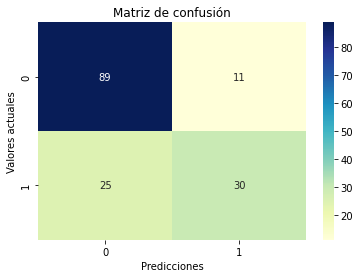

In [46]:
# Gráfica matriz de confusion
matrix = confusion_matrix(y_test, y_hat_test_sk)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Valores actuales')
plt.xlabel('Predicciones')

##**4.3 Reporte de calificaciones:** Conceptos

Informe que incluye Precision, Recall y F1-Score.    
        
**Precisión:** la precisión es la relación entre las observaciones positivas predichas correctamente y el total de observaciones positivas predichas. La pregunta que esta métrica responde es de todos los pasajeros etiquetados como sobrevivientes, ¿cuántos sobrevivieron realmente? La alta precisión se relaciona con la baja tasa de falsos positivos. Tenemos una precisión de 0,788 que es bastante buena.

* Precisión = TP / TP + FP

**Recall (Sensibilidad):** Recall es la proporción de observaciones positivas predichas correctamente para todas las observaciones en la clase real - sí. La pregunta para recordar las respuestas es: De todos los pasajeros que realmente sobrevivieron, ¿a cuántos etiquetamos? Un recuerdo superior a 0,5 es bueno.

* Recuperar = TP / TP + FN

**Puntuación F1:** La puntuación F1 es el promedio ponderado de Precisión y Recall. Por tanto, esta puntuación tiene en cuenta tanto los falsos positivos como los falsos negativos. Intuitivamente, no es tan fácil de entender como la precisión, pero F1 suele ser más útil que la precisión, especialmente si tiene una distribución de clases desigual. La precisión funciona mejor si los falsos positivos y los falsos negativos tienen un costo similar. Si el costo de los falsos positivos y los falsos negativos es muy diferente, es mejor mirar tanto Precision como Recall.

* Puntuación F1 = 2 * (Recall * Precisión) / (Recall + Precisión)

## **Puntuación de precisión:**

    TP: Verdaderos positivos
    FP: Falsos positivos

    Precisión: precisión de las predicciones positivas.
    Precisión = TP / (TP + FP)
        
   
## **Recall Score**
    FN: Falsos negativos

    Recall (Sensibilidad o tasa de verdaderos positivos): fracción de positivos que se identificaron correctamente.
    Recall = TP / (TP + FN)
        
## **Puntuación F1 (F1 Score)**
    F1 Score (también conocido como F-Score o F-Measure): una métrica útil para comparar dos clasificadores.
    F1 Score tiene en cuenta la precisión y la recuperación.
    Se crea al encontrar la media armónica de precisión y recuerdo.

    F1 = 2 x (precisión x recuperación) / (precisión + recuperación)
        
        
Referencia: [joshlawman.com (Metricas de clasificación)](http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/)

Referencia: [blog.exsilio.com (Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures)](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)

##**4.4 Reporte de calificaciones:** Implementación

In [48]:
# Se crea reporte de clasificaciones con ayuda de las métricas de sklearn
print(classification_report(y_test, y_hat_test_sk))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.73      0.55      0.62        55

    accuracy                           0.77       155
   macro avg       0.76      0.72      0.73       155
weighted avg       0.76      0.77      0.76       155



##**4.5 Comparativa de Accuracy para entrenamiento y prueba rexpecto a modelo en C++:**

Se importa imagen con los datos arrojados por el modelo artesanal desarrollado en C++:

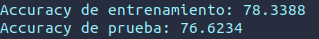

In [54]:
# Cálculo de accuracy con ayuda de las métricas de sklearn
print('Accuracy entrenamiento sklearn', accuracy_score(y_train, y_hat_train_sk) * 100)
print('Accuracy prueba sklearn', accuracy_score(y_test, y_hat_test_sk) * 100)

Accuracy entrenamiento sklearn 78.46655791190864
Accuracy prueba sklearn 76.77419354838709


## **5. Conclusiones:**

* De acuerdo a la teoría estudiada podemos concluir que el modelo realizado es  decente dado que nuestra puntuación F1 es más cercana a 1 en ambas métricas (Presicion y Recall), teniendo en cuenta que este calificador es la media ponderada entre las dos métricas que más importan, sin embargo, esto depende mucho de que se pretende lograr con el modelo realizado, dado que si lo que se desea es saber de entre las personas que se etiquetaron como positivas cuantas en realidad tienen diabetes, se debe ajustar un poco la Presicion, en el modelo realizado esta métrica se encuentra en 0.73, de tal manera se puede decir que entre las personas etiquetadas con diabetes el 73% en realidad padecen dicha enfermedad, lo cual no es una mala estimación pero podría mejorar.

* Para la creación del modelo es importante tener que interferir lo menos posible en la información que se tiene como dataset, esto con el fin de tener un modelo que represente un comportamiento más cercano a la realidad dado que se tienen datos reales, se recuerda que para esta implementación académica se realizó un tratamiento de los datos desaparecidos/nulos.

* De acuerdo a los datos en las métricas, normalización, promedios y desviación entregados por el modelo artesanal en C++ se observa que los datos son muy cercanos lo cual indica que el modelo realizado en C++ cumple con la paridad de la implementación realizada en Python con ayuda de las bibliotecas de sklearn, recordemos que en términos de rendimiento existen limitaciones dependiendo la implementación en el lenguaje de programación donde se desarrolla el modelo, el lenguaje C al ser un lenguaje compilado y no interpretado como lo es Python posee mejor rendimiento en tiempos de ejecución, sin embargo existen opciones de optimizacion de codigo como Cython, especialmente en métodos que generan cuello de botella y grandes cálculos computacionales lo cual puede ser una buena opción para datasets con gran cantidad de datos.

* Teniendo en cuenta el punto anterior se recomienda realizar un análisis con las comparativas respecto al rendimiento (tiempos de ejecución) al momento de construir el modelo en los lenguajes de Python y C++, en tal caso, sería de gran utilidad usar un dataset mas robusto que el implementado en este proyecto.

## **5. Bibliografía:**

Repositorio con ficheros y la implementación del modelo en C++: [github.com](https://github.com/jchaves1406/HPC-Logistic_Regression)

Fuente del dataset: [kaggle.com](https://www.kaggle.com/datasets/saurabh00007/diabetescsv)

* http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
* https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
* https://datascience.eu/es/matematica-y-estadistica/que-es-una-matriz-de-correlacion/
* https://pandas.pydata.org/docs/
* https://scikit-learn.org/0.21/documentation.html
* https://cplusplus.com/doc/
* https://eigen.tuxfamily.org/dox/